In [2]:
library(dplyr)
library("igraph")
library("RColorBrewer")

In [3]:
path = getwd()
path = substr(path, 1, nchar(path)-9)
setwd(paste0(path, "data"))
getwd()

[1] "/Users/chen.liang/Desktop/变量/splc_analysis/data"

In [4]:
Nodes_Data = readRDS(file = "Temp/Nodes_Data.rds")[2:4]
Edges_Data = readRDS(file = "Temp/Edges_Data.rds")

Nodes_Data[0:1,]
Edges_Data[0:1,]

id,country,type_label
Flex Ltd,US,Technology Hardware & Equipmen


to,from,weight
Applied Materials Inc,Flex Ltd,74.485176


# Making Network

In [5]:
Nodes_Data$size=3.5
Edges_Data$weight=1
net <- graph_from_data_frame(d=Edges_Data, vertices=Nodes_Data, directed=F) 
l=layout_with_lgl(net)

### Core Shell  
- The k-core of graph is a maximal subgraph in which each vertex has at least degree k.
- The coreness of a vertex is k if it belongs to the k-core but not to the (k+1)-core.

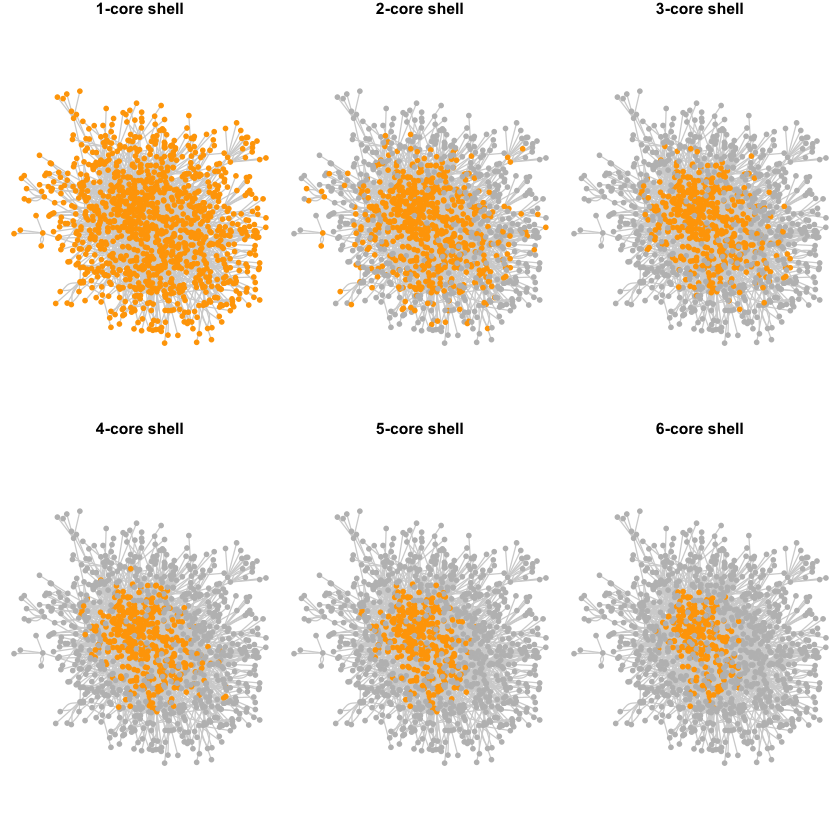

In [6]:
V(net)$coreness <- coreness(net)
par(mfrow=c(2, 3), mar=c(0.1,0.1,1,0.1))
set.seed(777)
fr <- layout_with_fr(net)
for (k in 1:6){
    
    V(net)$color <- ifelse(V(net)$coreness>=k, "orange", "grey")
    plot(net, main=paste0(k, '-core shell'), layout=fr, 
         vertex.label=NA, 
         vertex.frame.color=V(net)$color,
         edge.color="lightgrey")
}

In [7]:
# Num(nodes) got deleleted
length(names(coreness(net)[coreness(net)<1])) #1-core shell
length(names(coreness(net)[1<=coreness(net) & coreness(net)<2])) #2-core shell
length(names(coreness(net)[2<=coreness(net) & coreness(net)<3])) #3-core shell
length(names(coreness(net)[3<=coreness(net) & coreness(net)<4])) #4-core shell
nrow(Nodes_Data)

[1] 0

[1] 568

[1] 154

[1] 84

[1] 1185

In [13]:
1185-568-154
delete_node = c(names(coreness(net)[coreness(net)<3]))
Nodes = Nodes_Data %>% filter(!(Nodes_Data$id %in% delete_node))
nrow(Nodes)
nrow(Edges_Data)
Edges = Edges_Data %>% filter(!(Edges_Data$from %in% delete_node)) 
Edges = Edges %>% filter(!(Edges$to %in% delete_node)) 
nrow(Edges)

[1] 463

[1] 463

[1] 3030

[1] 2161

Nodes 1185->463, Edges 3030->2161

In [26]:
path = getwd()
#setwd(paste0(path, "/Temp"))

Nodes = Nodes[!duplicated(Nodes),]
Edges = Edges[!duplicated(Edges),]
nrow(Nodes)
nrow(Edges)
saveRDS(Nodes, file = "Nodes_Data.rds")
saveRDS(Edges, file = "Edges_Data.rds")

[1] 463

[1] 2161

In [27]:
path

[1] "/Users/chen.liang/Desktop/变量/splc_analysis/data/Temp"